In [15]:
import sys
sys.path.append('../')
sys.path.append('../3rd_Party/Vimba_4.2/VimbaPython/Source')
sys.path.append('C:\Chimera\B240_data_analysis\Library\ChimeraGenTools')
import matplotlib.pyplot as plt
import numpy as np
from AnalysisHelpers import findAtomLocs
from trap_balance import getTweezerAmplitudes, getTrapDepthData
from mako_camera import mako_camera
import h5py as h5

In [2]:
tweezer_moncam_ip = '10.10.0.8'
tweezer_moncam_setting = './../tweezer_monitor_20240329_5x5.xml'
mako = mako_camera(ipaddr=tweezer_moncam_ip, settingAddr=tweezer_moncam_setting)

In [4]:
avgImages = mako.getAvgImages()

10 Frame acquired from Mako G-319B (9614)


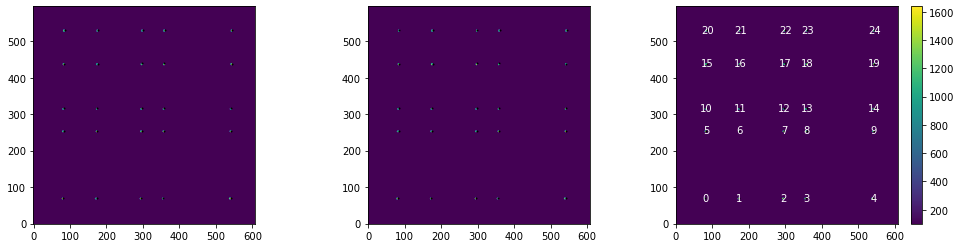

In [5]:
maximaLocs = findAtomLocs(avgImages, window=None, neighborhood_size=50., threshold=50, sort='MatchArray', debug_plot=True,n_cluster_row=5,
                            advanced_option = dict({"active":True, "image_threshold":100, "score_threshold":10}))

In [9]:
tweezerAmpFit = getTweezerAmplitudes(avgImages, maximaLocs, amp_option='fit', showResult=False)

In [19]:
# trap_depth, trap_depth_uncertainty = getTrapDepthData(trap_data_file='trap_depth_2024-1-22.h5')
with h5.File(r'./trap_depth_2024-1-22.h5', 'r') as f:
    trap_depth = f['trap_depth'][()]
    trap_depth_uncertainty = f['trap_depth_uncertainty'][()]
trap_depth = trap_depth[::-1]
trap_depth_uncertainty = trap_depth_uncertainty[::-1]

In [20]:
trap_depth.shape

(25,)